In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from sklearn.mixture import GaussianMixture
import pandas as pd
import gaussianfunctions as gauss

### With BIC, 2 components

In [2]:
def EMGMM(X,initial_param):
    n_components=gauss.BIC_gmm(X)
    em=gauss.GaussianEM(X,n_components,initial_param)
    t=gauss.findThreshold2(X,n_components,em)
    return(em,t)

def EMGMM2(X,initial_param):
    n_components=gauss.BIC_gmm(X)
    em=gauss.EMGMM_varconstraint(X,n_components,initial_param)
    t=gauss.findThreshold2(X,n_components,em)
    return(em,t)

### With BIC, 3 components

In [4]:
X1=np.random.normal(5,np.sqrt(0.01),100)
X2=np.random.normal(2.5,np.sqrt(0.2),50)
X3=np.random.normal(0,np.sqrt(2),25)
X=np.array(list(X1)+list(X2)+list(X3))

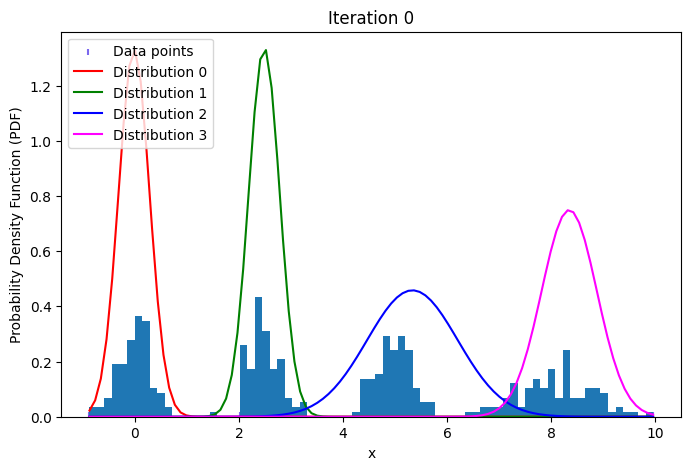

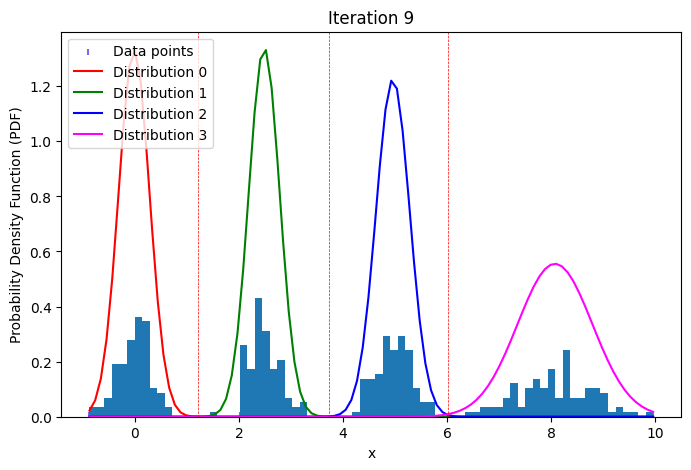

In [6]:
D1=np.random.normal(5,np.sqrt(0.1),100)
D2=np.random.normal(2.5,np.sqrt(0.1),100)
D3=np.random.normal(0,np.sqrt(0.1),100)
D4=np.random.normal(8, np.sqrt(0.5),100)
D=np.array(list(D1)+list(D2)+list(D3)+list(D4))

em=gauss.GaussianEM(D,4,[])
t=gauss.findThreshold1(D,4,em)
gauss.PlotGMM(D,em,10,t,[])

### Use sklearn.mixture.GaussianMixture

In [ ]:
from sklearn.mixture import BayesianGaussianMixture

def fitGaussEM(X):

    X=X.reshape(-1,1)
    gm=GaussianMixture().fit(X)
    N = np.arange(1, 11)
    models = [None for i in range(len(N))]

    for i in range(len(N)):
        models[i] = GaussianMixture(N[i]).fit(X)

    # compute the AIC and the BIC
    AIC = [m.aic(X) for m in models]
    BIC = [m.bic(X) for m in models]

    plt.figure(figsize=(8,5))
    M_best_BIC=models[np.argmin(BIC)]
    M_best_AIC=models[np.argmin(AIC)]

    b=np.linspace(np.min(X),np.max(X),100)

    log_prob1=M_best_BIC.score_samples(b.reshape(-1,1))
    log_prob2=M_best_AIC.score_samples(b.reshape(-1,1))

    resp1=M_best_BIC.predict_proba(b.reshape(-1,1))
    resp2=M_best_AIC.predict_proba(b.reshape(-1,1))

    pdf1=np.exp(log_prob1)
    pdf2=np.exp(log_prob2)


    # plt.plot(b,pdf1)
    plt.plot(b,pdf2)
    plt.hist(X,bins=75, density=True)

    plt.xlabel("$x$")
    plt.ylabel("Pdf")

    plt.show()



In [ ]:
def fitBayesianGauss(X,) :
    
    X=X.reshape(-1,1)
    gm=BayesianGaussianMixture().fit(X)
    
    bay_gmm_weights = gm.weights_
    np.round(bay_gmm_weights, 2)
    n_clusters_ = (np.round(bay_gmm_weights, 2) > 0).sum()
    print('Estimated number of clusters: ' + str(n_clusters_))



    # plt.plot(b,pdf1)
    plt.plot(b,pdf2)
    plt.hist(X,bins=75, density=True)

    plt.xlabel("$x$")
    plt.ylabel("Pdf")

    plt.show()


### Initial parameters

In [95]:
array=np.arange(10)
def get_spaced_elm(X, n_components):
    spaced_elm = X[np.round(np.linspace(0, len(X)-1, n_components)).astype(int)]
    spaced_elm= spaced_elm[0]+1e-6
    return spaced_elm
get_spaced_elm(array,3)

array([0, 4, 9])

In [86]:
def get_mid_spaced(array,n_elements):
    spaced_elm = array[np.round(np.linspace(0, len(array)-1, n_elements)).astype(int)]
    mid_spaced_elm=[]
    for i in range (n_elements-2):
        mid_spaced_elm.append(spaced_elm[i+1])
        
    return(mid_spaced_elm)

In [93]:
D1=np.random.normal(5,np.sqrt(0.1),100)
D2=np.random.normal(2.5,np.sqrt(0.1),100)
D3=np.random.normal(0,np.sqrt(0.1),100)
D4=np.random.normal(8, np.sqrt(0.5),100)
D=np.array(list(D1)+list(D2)+list(D3)+list(D4))
mid=get_mid_spaced(np.sort(D),4)

init_means=get_spaced_elm(np.sort(D),4)

[-0.94579928  2.36010223  5.15530995  9.82017579] -0.9457992754052875 9.820175785578638


# Thresholding

### Using z-score

In [153]:

def findThres(X,n_components,iteration_data):

    X_lastiter=iteration_data[-1]
    thresholds=[]

    for k in range(n_components-1):
        X_space=np.linspace(min(X),max(X),100)
        zscore_1=list()
        zscore_2=list()
        for i in range(len(X_space)):
            zscore_1.append((X_space[i]-X_lastiter[k]['Mean'])/(np.sqrt(X_lastiter[k]['Variance'])))
            zscore_2.append((X_space[i]-X_lastiter[k+1]['Mean'])/(np.sqrt(X_lastiter[k+1]['Variance'])))
            
            def area_left(zscore):
                return norm.cdf(zscore)
            def area_right(zscore):
                return 1-norm.cdf(zscore)

            area_gaussone = area_right(zscore_1)
            area_gausstwo = area_left(zscore_2)

            thres = X_space[np.argmin(area_gaussone+area_gausstwo)]
        thresholds.append(thres)
    return(thresholds)
    
findThres(D,4,gauss.GaussianEM(D,4,[]))

[1.2913232325552273, 3.6668851421587663, 5.934466964962144]

In [41]:
z1=np.abs(t[1])
z2=np.abs(t[2])
list(set(z1).intersection(z2))
# There is no point where z1=z2

[]

### Testing variance constraints

In [21]:
def EM(X,n_components:int, initial_param):
    
    if initial_param==[]:
        def get_spaced_elm(X, n_components):
            spaced_elm = X[np.round(np.linspace(0, len(X)-1, n_components)).astype(int)]
            return spaced_elm
        
        initial_means=get_spaced_elm(np.sort(X),n_components)
        
        initial_param=list()
        for i in range(n_components):
            init_params={
            'Mean':initial_means[i],
            'Variance': 0.1,
            'Weight': 1/n_components
        }
            initial_param.append(init_params)

    epsilon=-1e-200 #to avoid singularities
    #stopping condition
    mean_delta=1e-6
    var_delta=1e-4
    weight_delta=1e-8

    max_iteration=50
    iteration=0

    iteration_param=list()

    while iteration<max_iteration:
        
        px_j=[]
        for j in range(n_components):
            px_j.append(gauss.GaussianPDF(X, initial_param[j]['Mean'], initial_param[j]['Variance']))
        px_j = np.array(px_j)
        
        posterior = []
        new_parameters=list()
        for j in range(n_components):
            #Calculate the probabilities of each data to belong from either gaussian  
            posterior.append((px_j[j] * initial_param[j]['Weight']) / (np.sum([px_j[i] * initial_param[i]['Weight'] for i in range(n_components)], axis=0)+epsilon))
        
        #Maximisation step (M-step):
            #Update the parameters
            mu=np.sum(posterior[j] * X) / (np.sum(posterior[j]+epsilon))
            
            # Constraint the variance
            newvar_temp=np.sum(posterior[j] * np.square(X - mu)) / (np.sum(posterior[j]+epsilon))
            if newvar_temp<0.01:
                newvar=newvar_temp
            else:
                newvar=initial_param[j]['Variance']

            # New parameters
            new_param={
                'Mean':mu,
                'Variance':newvar,
                'Weight':np.mean(posterior[j])
            }
            new_parameters.append(new_param)

        #Calculate difference between parameters
        mean_diff=list()
        for i in range (n_components):
            mean_diff_indiv=(abs(new_parameters[i]['Mean']-initial_param[i]['Mean'])/(abs(initial_param[i]['Mean']+epsilon)))
            mean_diff.append(mean_diff_indiv)

        var_diff=list()
        for i in range(n_components):
            var_diff_indiv=(abs(new_parameters[i]['Variance']-initial_param[i]['Variance'])/abs(initial_param[i]['Variance']))
            var_diff.append(var_diff_indiv)

        weight_diff=list()
        for i in range(n_components):
            weight_diff_indv=(abs(new_parameters[i]['Weight']-initial_param[i]['Weight'])/abs(initial_param[i]['Weight']))
            weight_diff.append(weight_diff_indv)
        
        #Check if difference between iterations is less than the stopping criterion
        def check_less_than(list, value): 
            for x in list: 
                if value <= x: 
                    return False
            return True

        # Stop iterations if already satisfy the stopping condition
        if check_less_than(mean_diff,mean_delta) is True\
            and check_less_than(var_diff,var_delta) is True\
            and check_less_than(weight_diff, weight_delta) is True:
            break

        iteration+=1
        initial_param=new_parameters

        iteration_param.append(new_parameters)
    return(iteration_param)

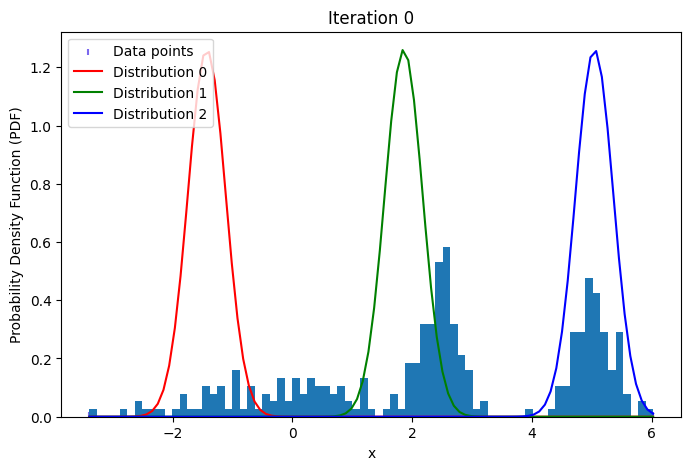

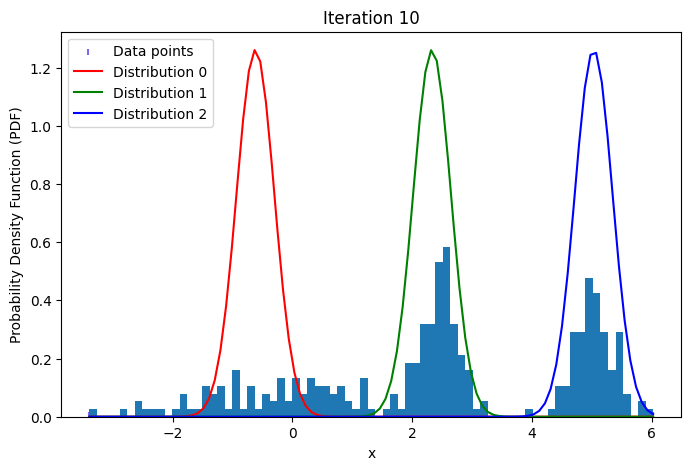

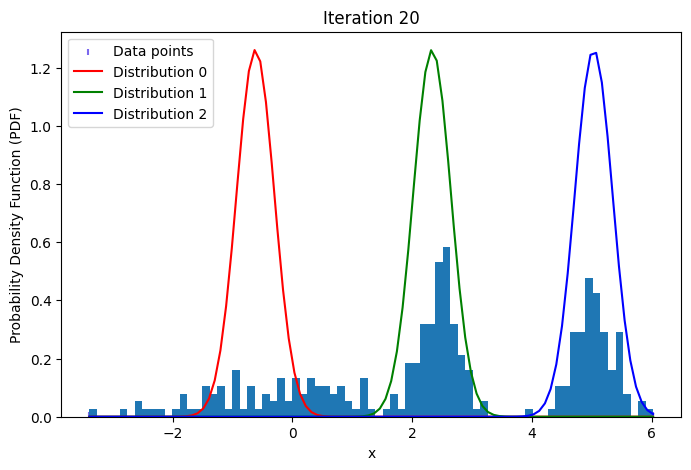

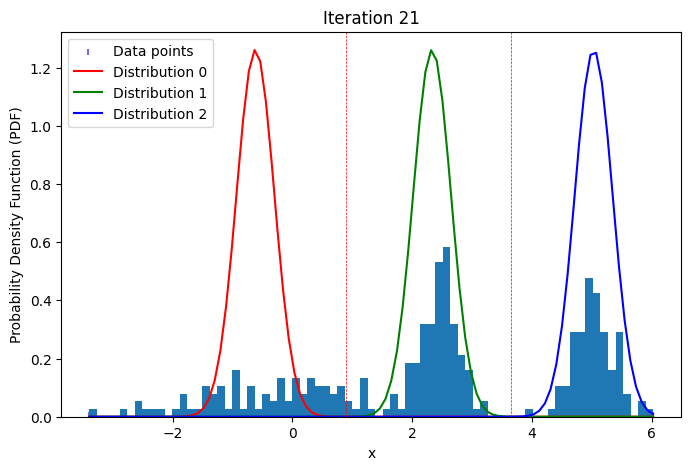

In [28]:
D1=np.random.normal(5,np.sqrt(0.1),100)
D2=np.random.normal(2.5,np.sqrt(0.1),100)
D3=np.random.normal(0,np.sqrt(2),100)
D=np.array(list(D1)+list(D2)+list(D3))

em=EM(D,3,[])
t=gauss.findThreshold1(D,3,em)
gauss.PlotGMM(D,em,10,t,[])